<a href="https://colab.research.google.com/github/Sarthak-Agase-VIIT/Tools-for-Data-Science/blob/main/Capstone_Project_Final_IBM_Applied_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Let's setup the environment by importing required libraries.

In [26]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from bs4 import BeautifulSoup
import csv

!pip install geocoder
import geocoder # to get longitude and latitude

!conda install -c conda-forge folium=0.5.0 --yes
import folium # Map plotting library
import numpy as np
from pandas import json_normalize # Tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

/bin/bash: line 1: conda: command not found
/bin/bash: line 1: conda: command not found
Libraries imported.


<a id='item1'></a>

In [27]:
source = requests.get('https://en.wikipedia.org/wiki/Category:Areas_of_Manchester').text
soup = BeautifulSoup(source, 'lxml')

In [28]:
csv_file = open('manchester.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Neighbourhood'])

15

In [29]:
mwcg = soup.find_all(class_ = "mw-category-group")

length = len(mwcg) # Gets the length of number of `mw-category-groups` present

for i in range(1, length):  # Gets all the neighbourhoods
    lists = mwcg [i].find_all('a')
    for list in lists:
        nbd = list.get('title') # Gets the title of the neighbourhood
        csv_writer.writerow([nbd]) # Writes the name of the neighbourhood in the csv file

In [30]:
csv_file.close()


In [31]:
manchester_raw = pd.read_csv('manchester.csv')

In [32]:
manchester_raw.shape

(64, 1)

In [33]:
manchester_raw

,Neighbourhood
0,Baguley
1,Barlow Moor
2,"Belle Vue, Manchester"
3,Benchill
4,"Beswick, Manchester"
5,Blackley
6,Bradford-with-Beswick
7,"Bradford, Manchester"
8,Brooklands (Manchester ward)
9,Burnage


In [34]:
# Initialize varialbes
lat = []
lng = []
lat_lng_coords = None

# Get postcodes from neighbourhoods table
neighbourhoods = manchester_raw['Neighbourhood']

# Store latitude and longitude values in lat and lng
for nh in neighbourhoods:
    g = geocoder.arcgis('{}, Manchester, UK'.format(nh))
    lat_lng_coords = g.latlng
    lat.append(lat_lng_coords[0])
    lng.append(lat_lng_coords[1])

In [35]:
man_data = manchester_raw
man_data['Latitude'] = lat
man_data['Longitude'] = lng

In [36]:
man_data.head()

,Neighbourhood,Latitude,Longitude
0,Baguley,53.399432,-2.294060
1,Barlow Moor,53.426562,-2.266241
2,"Belle Vue, Manchester",53.460524,-2.198519
3,Benchill,53.389117,-2.265841
4,"Beswick, Manchester",53.478923,-2.200211


### Let's setup FourSquare credentials.

In [37]:
CLIENT_ID = 'JW1LOUKCHOBJJGPYYZFROQZINFPN0AU4E44WNXM51NPILF3W' # your Foursquare ID
CLIENT_SECRET = 'QEEXIE4ODGP1UZVI35RD0OQL2XS2WQWE3ZNAQ3T4CMSOMZNJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JW1LOUKCHOBJJGPYYZFROQZINFPN0AU4E44WNXM51NPILF3W
CLIENT_SECRET:QEEXIE4ODGP1UZVI35RD0OQL2XS2WQWE3ZNAQ3T4CMSOMZNJ


### Now we will get Latitude and Longitude of Manchester.

In [38]:
from geopy.geocoders import Nominatim

address = 'Manchester, UK'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manchester are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manchester are 53.4794892, -2.2451148.


### Let's plot map of Manchester using latitude and longitude values.

In [39]:
man_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(man_data['Latitude'], man_data['Longitude'], man_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(man_map)

man_map

### In the following call we will create a function which will extract the category from the FourSquare vanues. Later we will apply FourSquare API in all the neighbourhoods on Manchester.

In [40]:
# Gets the name of the category

def get_category_type(row):
    categories_list = row['Category']

    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [41]:
explore_df_list = []

for i, nhood_name in enumerate(man_data['Neighbourhood']):

    try :
        #Get neighbourhood data
        nhood_name = man_data.loc[i, 'Neighbourhood']
        nhood_lat = man_data.loc[i, 'Latitude']
        nhood_lng = man_data.loc[i, 'Longitude']

        radius = 1000
        LIMIT = 30

        url = 'https://api.foursquare.com/v2/venues/explore?client_id={} \
        &client_secret={}&ll={},{}&v={}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, nhood_lat, nhood_lng, VERSION, radius, LIMIT)

        results = json.loads(requests.get(url).text)
        results = results['response']['groups'][0]['items']

        nearby = json_normalize(results) # Flatten JSON

        # Filter the columns
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
        nearby = nearby.loc[:, filtered_columns]

        # Rename the columns
        columns = ['Name', 'Category', 'Latitude', 'Longitude']
        nearby.columns = columns

        # Get the categories
        nearby['Category'] = nearby.apply(get_category_type, axis=1)

        # Get the required data
        for i, name in enumerate(nearby['Name']):
            s_list = nearby.loc[i, :].values.tolist()  # Converts the numpy array to a python list
            f_list = [nhood_name, nhood_lat, nhood_lng] + s_list
            explore_df_list.append(f_list)

    except Exception as e:
        pass

### Now we will create a dataframe for performing clustering.

In [42]:
explore_man = pd.DataFrame([item for item in explore_df_list])
explore_man.columns = ['Neighbourhood', 'Neighbourhood Latitude', 'Neighbourhood Longitude', 'Venue Name', 'Venue Category', 'Venue Latitude', 'Venue Longitude']
explore_man.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue Name,Venue Category,Venue Latitude,Venue Longitude
0,Baguley,53.399432,-2.29406,Lidl,Supermarket,53.400455,-2.295649
1,Baguley,53.399432,-2.29406,B&M Store,Furniture and Home Store,53.401589,-2.299105
2,Baguley,53.399432,-2.29406,Shell,Fuel Station,53.400577,-2.293091
3,Baguley,53.399432,-2.29406,Costa Coffee,Coffee Shop,53.400795,-2.295027
4,Baguley,53.399432,-2.29406,McDonald's,Fast Food Restaurant,53.400461,-2.289088


### Now we will perform one-hot encoding to analyze neighbourhoods of Manchester.

In [43]:
man_1hot = pd.get_dummies(explore_man[['Venue Category']], prefix="", prefix_sep="")


# Add neighbourhood column back to dataframe
man_1hot['Neighbourhood'] = explore_man['Neighbourhood']


# Move neighbourhood column to the first column
fixed_columns = [man_1hot.columns[-1]] + man_1hot.columns[:-1].values.tolist()
man_1hot = man_1hot[fixed_columns]

man_1hot.head()

,Neighbourhood,Airport Lounge,Airport Service,American Restaurant,Antique Store,Art Gallery,Arts and Crafts Store,Arts and Entertainment,Asian Restaurant,Australian Restaurant,Automotive Repair Shop,Bagel Shop,Bakery,Bar,Bed and Breakfast,Beer Bar,Beer Garden,Beer Store,Bicycle Store,Bingo Center,Bistro,Bookstore,Bowling Alley,Brazilian Restaurant,Brewery,Burger Joint,Bus Station,Bus Stop,Café,Canal Lock,Caribbean Restaurant,Casino,Cheese Store,Chinese Restaurant,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Cafeteria,Comic Book Store,Concert Hall,Convenience Store,Cupcake Shop,Deli,Department Store,Dessert Shop,Discount Store,Donut Shop,Duty-free Store,Electronics Store,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Eyecare Store,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Fish and Chips Shop,Flea Market,Food Court,Food and Beverage Retail,Forest,Fried Chicken Joint,Fuel Station,Furniture and Home Store,Garden,Garden Center,Gastropub,Go Kart Track,Greek Restaurant,Grocery Store,Gym and Studio,Halal Restaurant,Hardware Store,History Museum,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Parlor,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz and Blues Venue,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Middle Eastern Restaurant,Mini Golf Course,Mobile Phone Store,Monument,Motorcycle Dealership,Movie Theater,Museum,Music Venue,Nature Preserve,Newsagent,North Indian Restaurant,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Supplies Store,Pharmacy,Pie Shop,Pier,Pizzeria,Platform,Playground,Polish Restaurant,Pop-Up Store,Portuguese Restaurant,Pub,Rail Station,Record Store,Rental Car Location,Restaurant,Retail,Sandwich Spot,Science Museum,Shopping Mall,Shopping Plaza,Soccer Stadium,Spanish Restaurant,Speakeasy,Sporting Goods Retail,Steakhouse,Supermarket,Sushi Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Tour Provider,Toy Store,Track Stadium,Tram Station,Turkish Restaurant,Vegan and Vegetarian Restaurant,Video Games Store,Vietnamese Restaurant,Warehouse or Wholesale Store,Whisky Bar,Wine Bar,Women's Store,Yemeni Restaurant
0,Baguley,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Baguley,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

### In the following step we will agregate the venues by neighbourhoods and later we will create a function to return most common venues.

In [44]:
man_grouped = man_1hot.groupby('Neighbourhood').mean().reset_index()
man_grouped.head()

,Neighbourhood,Airport Lounge,Airport Service,American Restaurant,Antique Store,Art Gallery,Arts and Crafts Store,Arts and Entertainment,Asian Restaurant,Australian Restaurant,Automotive Repair Shop,Bagel Shop,Bakery,Bar,Bed and Breakfast,Beer Bar,Beer Garden,Beer Store,Bicycle Store,Bingo Center,Bistro,Bookstore,Bowling Alley,Brazilian Restaurant,Brewery,Burger Joint,Bus Station,Bus Stop,Café,Canal Lock,Caribbean Restaurant,Casino,Cheese Store,Chinese Restaurant,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Cafeteria,Comic Book Store,Concert Hall,Convenience Store,Cupcake Shop,Deli,Department Store,Dessert Shop,Discount Store,Donut Shop,Duty-free Store,Electronics Store,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Eyecare Store,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Fish and Chips Shop,Flea Market,Food Court,Food and Beverage Retail,Forest,Fried Chicken Joint,Fuel Station,Furniture and Home Store,Garden,Garden Center,Gastropub,Go Kart Track,Greek Restaurant,Grocery Store,Gym and Studio,Halal Restaurant,Hardware Store,History Museum,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Parlor,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz and Blues Venue,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Middle Eastern Restaurant,Mini Golf Course,Mobile Phone Store,Monument,Motorcycle Dealership,Movie Theater,Museum,Music Venue,Nature Preserve,Newsagent,North Indian Restaurant,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Supplies Store,Pharmacy,Pie Shop,Pier,Pizzeria,Platform,Playground,Polish Restaurant,Pop-Up Store,Portuguese Restaurant,Pub,Rail Station,Record Store,Rental Car Location,Restaurant,Retail,Sandwich Spot,Science Museum,Shopping Mall,Shopping Plaza,Soccer Stadium,Spanish Restaurant,Speakeasy,Sporting Goods Retail,Steakhouse,Supermarket,Sushi Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Tour Provider,Toy Store,Track Stadium,Tram Station,Turkish Restaurant,Vegan and Vegetarian Restaurant,Video Games Store,Vietnamese Restaurant,Warehouse or Wholesale Store,Whisky Bar,Wine Bar,Women's Store,Yemeni Restaurant
0,Baguley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.076923,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000,0.0,0.076923,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.153846,0.076923,0.076923,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.076923,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.153846,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.153846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Barlow Moor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000,0.0,0.090909,0.0,0.000000,0.0,0.0,0.0,0.090909,0.0,0.090909,0.000000,0.000000,0.0,0.0,0.0,0.0,0.181818,0.0,0.0,0.000000,0.0,0.0,0.0,0.090909,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Belle Vue, Manchester",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0

In [45]:
def top_common_venues(row, top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)

    return row_categories_sorted.index.values[0:top_venues]

### Now we will create a new dataframe to get the top 10 venues.


In [46]:
top_venues = 10
indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = man_grouped['Neighbourhood']

for ind in np.arange(man_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = top_common_venues(man_grouped.iloc[ind, :], top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baguley,Supermarket,Tram Station,Fuel Station,Fast Food Restaurant,Furniture and Home Store,Pet Supplies Store,Hardware Store,Coffee Shop,Clothing Store,Garden
1,Barlow Moor,Grocery Store,Hotel,Bus Station,Middle Eastern Restaurant,Forest,Fuel Station,Lake,Park,Indian Restaurant,Fast Food Restaurant
2,"Belle Vue, Manchester",Supermarket,Grocery Store,Market,Indian Restaurant,Dessert Shop,Discount Store,Fast Food Restaurant,Electronics Store,Bingo Center,Airport Lounge
3,Benchill,Tram Station,Supermarket,Bus Station,Pub,Bus Stop,Farm,Airport Lounge,North Indian Restaurant,Museum,Music Venue
4,"Beswick, Manchester",Soccer Stadium,Fish and Chips Shop,Pub,Track Stadium,Sporting Goods Retail,Music Venue,Supermarket,Fuel Station,Chinese Restaurant,Fast Food Restaurant


### Now we will apply K-means clustering on the dataframe.


In [47]:
man_grouped_clustering = man_grouped.drop('Neighbourhood', axis=1)

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [49]:
max_range = 15 #Max range 15 (number of clusters)

from sklearn.metrics import silhouette_samples, silhouette_score


indices = []
scores = []

for man_clusters in range(2, max_range) :

    # Run k-means clustering
    man_gc = man_grouped_clustering
    kmeans = KMeans(n_clusters = man_clusters, init = 'k-means++', random_state = 0).fit_predict(man_gc)

    # Gets the score for the clustering operation performed
    score = silhouette_score(man_gc, kmeans)

    # Appending the index and score to the respective lists
    indices.append(man_clusters)
    scores.append(score)

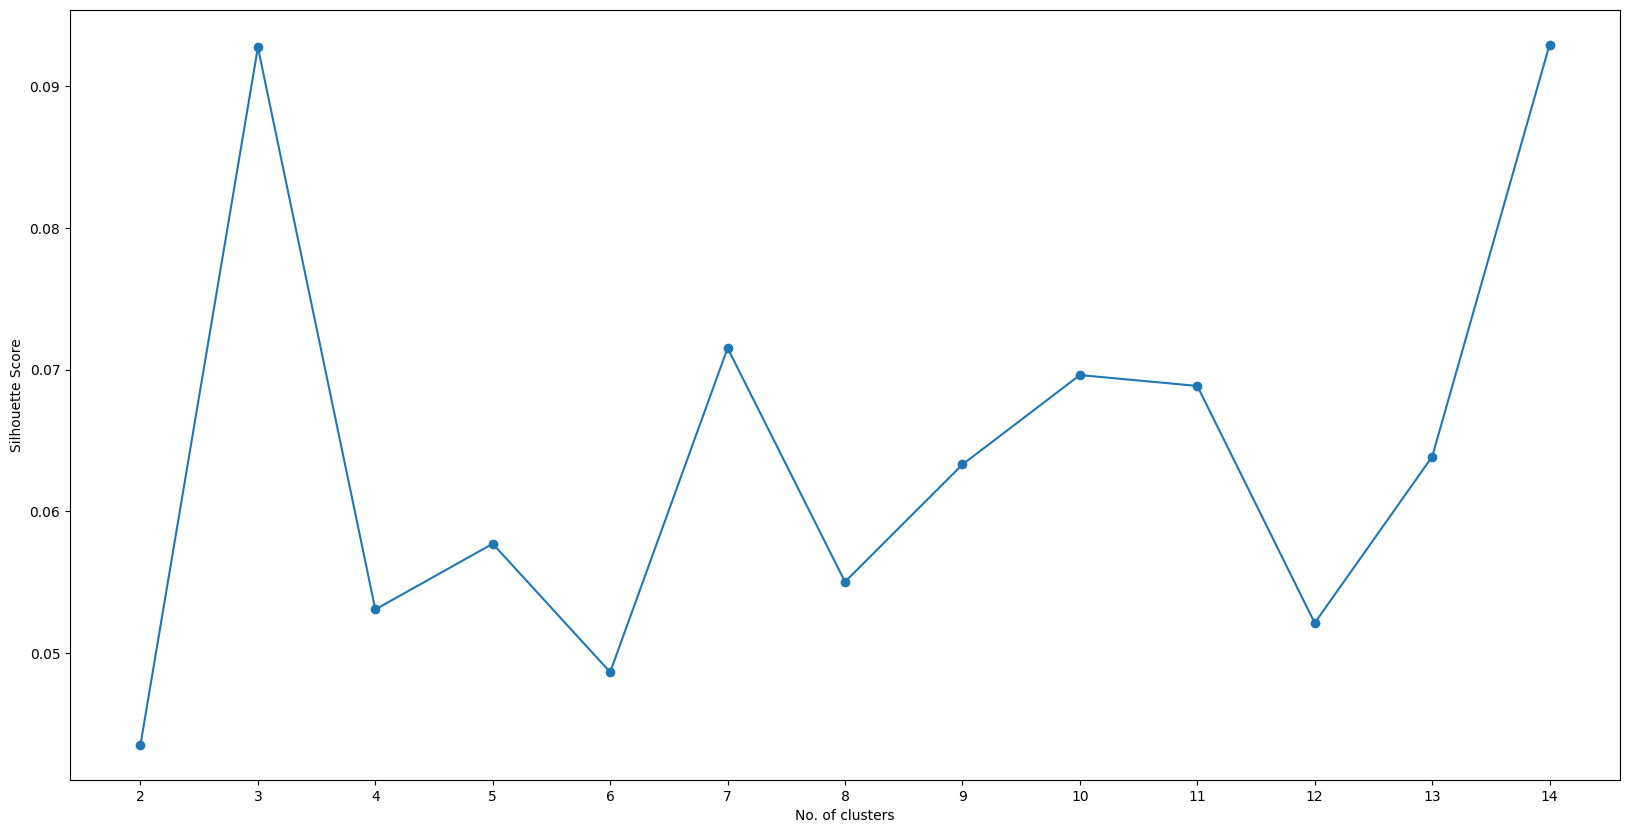

In [50]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

### From the graph the optimal number is found to be 8 using the Elbow Method.


In [51]:
opt_value = 8

### Now that we have calculated out optimum value of clusters, we can proceed with K-Means clustering.

In [52]:
man_clusters = opt_value

# Run k-means clustering
man_gc = man_grouped_clustering
kmeans = KMeans(n_clusters = man_clusters, init = 'k-means++', random_state = 0).fit(man_gc)

In [53]:
# Add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

### Now we will crate a final version of dataframe containing all the necessary data.


In [54]:
man_final = man_data
man_final = man_final.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
man_final.dropna(inplace = True)
man_final['Cluster Labels'] = man_final['Cluster Labels'].astype(int)
man_final.head()

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baguley,53.399432,-2.294060,3,Supermarket,Tram Station,Fuel Station,Fast Food Restaurant,Furniture and Home Store,Pet Supplies Store,Hardware Store,Coffee Shop,Clothing Store,Garden
1,Barlow Moor,53.426562,-2.266241,2,Grocery Store,Hotel,Bus Station,Middle Eastern Restaurant,Forest,Fuel Station,Lake,Park,Indian Restaurant,Fast Food Restaurant
2,"Belle Vue, Manchester",53.460524,-2.198519,3,Supermarket,Grocery Store,Market,Indian Restaurant,Dessert Shop,Discount Store,Fast Food Restaurant,Electronics Store,Bingo Center,Airport Lounge
3,Benchill,53.389117,-2.265841,1,Tram Station,Supermarket,Bus Station,Pub,Bus Stop,Farm,Airport Lounge,North Indian Restaurant,Museum,Music Venue
4,"Beswick, Manchester",53.478923,-2.200211,2,Soccer Stadium,Fish and Chips Shop,Pub,Track Stadium,Sporting Goods Retail,Music Venue,Supermarket,Fuel Station,Chinese Restaurant,Fast Food Restaurant


### In the next step we will visualize the clusters using Folium.

In [55]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Setup color scheme for different clusters
x = np.arange(man_clusters)
ys = [i + x + (i*x)**2 for i in range(man_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(man_final['Latitude'], man_final['Longitude'], man_final['Neighbourhood'],
                                  man_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster + 1) + ')', parse_html=True)
    map_clusters.add_child(
        folium.features.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7))

map_clusters

### Now lets have a look at all four clusters.

In [56]:
val = 1
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Brooklands (Manchester ward),Fuel Station,Pub,Bakery,Hotel,Supermarket,Halal Restaurant,Italian Restaurant,Pizzeria,Museum,Music Venue
11,Castlefield,Cocktail Bar,Pub,Restaurant,Hotel,Science Museum,Steakhouse,Bar,Italian Restaurant,Spanish Restaurant,Burger Joint
18,Circle Square Manchester,Pub,Indian Restaurant,Restaurant,Bakery,Monument,Coffee Shop,Movie Theater,Café,College Arts Building,Fast Food Restaurant
22,Didsbury,Italian Restaurant,Pub,Park,Hotel,Indian Restaurant,Bar,Grocery Store,Tea Room,Portuguese Restaurant,Coffee Shop
23,Fallowfield,Pub,Asian Restaurant,Coffee Shop,Fast Food Restaurant,Bar,Supermarket,Middle Eastern Restaurant,Greek Restaurant,Fish and Chips Shop,Sandwich Spot
25,Great Heaton,Pub,Coffee Shop,Arts and Entertainment,Park,Garden Center,Airport Lounge,Pastry Shop,Museum,Music Venue,Nature Preserve
26,Green Quarter,Bar,Pub,Music Venue,Department Store,Brewery,Tea Room,Sandwich Spot,Café,Coffee Shop,Gym and Studio
31,Hulme,Indian Restaurant,Pub,Café,Hotel,Coffee Shop,Bar,Gastropub,Pop-Up Store,Concert Hall,Restaurant
32,Ladybarn,Pub,Park,Indian Restaurant,Asian Restaurant,Fast Food Restaurant,Supermarket,Bar,Portuguese Restaurant,Chinese Restaurant,Food and Beverage Retail
35,Manchester city centre,Pub,Hotel,Restaurant,Tea Room,Italian Restaurant,Polish Restaurant,Theater,Concert Hall,Coffee Shop,Cocktail Bar


In [57]:
val = 2
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Benchill,Tram Station,Supermarket,Bus Station,Pub,Bus Stop,Farm,Airport Lounge,North Indian Restaurant,Museum,Music Venue
28,Harpurhey,Supermarket,Park,Flea Market,Eyecare Store,Tram Station,Hotel,Fast Food Restaurant,Pet Supplies Store,Persian Restaurant,Performing Arts Venue
43,Newton Heath,Supermarket,Pub,Bus Stop,Park,Tram Station,Pharmacy,Pet Supplies Store,Persian Restaurant,Performing Arts Venue,Pastry Shop
51,"Peel Hall, Wythenshawe",Tram Station,Fast Food Restaurant,Hotel,Discount Store,Supermarket,Coffee Shop,Tanning Salon,Market,Fuel Station,Nature Preserve


In [58]:
val = 3
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barlow Moor,Grocery Store,Hotel,Bus Station,Middle Eastern Restaurant,Forest,Fuel Station,Lake,Park,Indian Restaurant,Fast Food Restaurant
4,"Beswick, Manchester",Soccer Stadium,Fish and Chips Shop,Pub,Track Stadium,Sporting Goods Retail,Music Venue,Supermarket,Fuel Station,Chinese Restaurant,Fast Food Restaurant
5,Blackley,Park,Coffee Shop,Pub,Grocery Store,Airport Lounge,Movie Theater,Museum,Music Venue,Nature Preserve,Newsagent
6,Bradford-with-Beswick,Event Space,Fuel Station,Track Stadium,Tram Station,Thai Restaurant,Theater,Tour Provider,Bar,Soccer Stadium,Fast Food Restaurant
7,"Bradford, Manchester",Farmers Market,Pizzeria,Soccer Stadium,Bus Stop,Clothing Store,Park,Museum,Music Venue,Nature Preserve,Newsagent
13,Chorlton (ward),Indian Restaurant,Grocery Store,Pizzeria,Record Store,Falafel Restaurant,Caribbean Restaurant,Middle Eastern Restaurant,North Indian Restaurant,Fuel Station,Park
14,Chorlton Park (ward),Indian Restaurant,Grocery Store,Hotel,Bar,Coffee Shop,Park,North Indian Restaurant,Caribbean Restaurant,Falafel Restaurant,Spanish Restaurant
15,Chorlton-cum-Hardy,Coffee Shop,Indian Restaurant,Pizzeria,Park,Bar,Pub,Grocery Store,Gastropub,Restaurant,Fuel Station
16,Chorlton-on-Medlock,Indian Restaurant,Middle Eastern Restaurant,Café,Halal Restaurant,Hookah Bar,Korean Restaurant,Coffee Shop,Dessert Shop,Falafel Restaurant,Fast Food Restaurant
17,Chorltonville,Indian Restaurant,Grocery Store,Park,Pub,Coffee Shop,Pizzeria,Lake,Thai Restaurant,Café,Falafel Restaurant


In [59]:
val = 4
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baguley,Supermarket,Tram Station,Fuel Station,Fast Food Restaurant,Furniture and Home Store,Pet Supplies Store,Hardware Store,Coffee Shop,Clothing Store,Garden
2,"Belle Vue, Manchester",Supermarket,Grocery Store,Market,Indian Restaurant,Dessert Shop,Discount Store,Fast Food Restaurant,Electronics Store,Bingo Center,Airport Lounge
24,Gorton,Supermarket,Fuel Station,Discount Store,Fast Food Restaurant,Rail Station,Bingo Center,Go Kart Track,Bakery,Market,Airport Lounge
34,Longsight,Supermarket,Grocery Store,Market,Park,Pastry Shop,Turkish Restaurant,Electronics Store,Dessert Shop,Indian Restaurant,Pet Supplies Store
49,Openshaw,Supermarket,Discount Store,Fuel Station,Tram Station,Coffee Shop,Clothing Store,Farmers Market,Bakery,Pizzeria,Grocery Store
56,"St John's, Manchester",Supermarket,Grocery Store,Park,Market,Pastry Shop,Electronics Store,Turkish Restaurant,Bakery,College Cafeteria,Dessert Shop


In [60]:
val = 5
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
59,West Gorton,Sandwich Spot,Discount Store,Chinese Restaurant,Airport Lounge,Movie Theater,Museum,Music Venue,Nature Preserve,Newsagent,North Indian Restaurant


In [61]:
val = 6
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
53,Sharston,Supermarket,Farm,Tram Station,Pie Shop,Newsagent,Motorcycle Dealership,Pier,Movie Theater,Museum,Music Venue


In [62]:
val = 7
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Burnage,Supermarket,Indian Restaurant,Motorcycle Dealership,Park,Bus Station,Coffee Shop,Rail Station,Rental Car Location,Liquor Store,Museum
10,Burnage (ward),Supermarket,Indian Restaurant,Motorcycle Dealership,Park,Bus Station,Coffee Shop,Rail Station,Rental Car Location,Liquor Store,Museum
12,"Cheetham, Manchester",Coffee Shop,Fuel Station,Supermarket,Museum,Italian Restaurant,Halal Restaurant,Middle Eastern Restaurant,Grocery Store,Bagel Shop,Tram Station
20,Collyhurst,Pharmacy,Coffee Shop,Tram Station,Clothing Store,Concert Hall,Sporting Goods Retail,Furniture and Home Store,Fast Food Restaurant,Event Space,Park
21,Crumpsall,Coffee Shop,Italian Restaurant,Halal Restaurant,Grocery Store,Tram Station,Sandwich Spot,Fuel Station,Airport Lounge,North Indian Restaurant,Movie Theater
30,"Holt Town, Manchester",Bar,Fish and Chips Shop,Coffee Shop,Pizzeria,Sporting Goods Retail,Music Venue,Newsagent,Rental Car Location,Tour Provider,Park
40,New Islington,Coffee Shop,Beer Bar,Bar,Hotel,Pub,Indian Restaurant,Lounge,Café,Supermarket,Fish and Chips Shop
42,Newall Green,Coffee Shop,Playground,Convenience Store,Bus Stop,Pub,Newsagent,Tram Station,Sandwich Spot,Pastry Shop,Music Venue
46,Northern Quarter (Manchester),Coffee Shop,Record Store,Beer Bar,Arts and Crafts Store,Restaurant,Café,Flea Market,Fast Food Restaurant,Brazilian Restaurant,Tea Room
52,"Ringway, Manchester",Coffee Shop,Airport Lounge,Duty-free Store,Rental Car Location,Sandwich Spot,Hotel,Newsagent,Bar,Restaurant,Hotel Bar


In [63]:
val = 8
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
39,"Moston, Manchester",Supermarket,Sporting Goods Retail,Park,Newsagent,Monument,Motorcycle Dealership,Movie Theater,Museum,Music Venue,Nature Preserve


### After studying all four clusters, it is recommended to the client that neighbourhoods such as Barlow Moor, Brookelands and Hyde Newton(Ward) that fall in cluster 4 look like good locations for starting a restaurant. The client can go ahead and make a decision depending on othr factors like availability and legal requirements that are out of scope of this project.